Collatz binary notebook

In [386]:
"""
This notebook analyses collatz sequences from a binary perspective.
"""

# Imports
import random as rnd
from math import log2
import matplotlib.pyplot as plt
import pandas as pd
from collatz import generator as gen
from collatz import commons as com

# Configuration
MAX_VALUE = 101
K_FACTOR = 1
MAX_ITERATIONS = 600
PRINT_TABLE = True

START_VALUE = rnd.randint(1, MAX_VALUE)

if START_VALUE % 2 == 0:
    START_VALUE = START_VALUE + 1

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Create a collatz sequence and analyse it
analysis_frame = gen.generate_collatz_sequence(
    start_value=START_VALUE, k=K_FACTOR, max_iterations=MAX_ITERATIONS)

# Derive new fields
analysis_frame["v1"] = START_VALUE
analysis_frame["bin_str"] = analysis_frame["collatz"].apply(com.to_binary)
analysis_frame["bin_len"] = analysis_frame["bin_str"].apply(len)
analysis_frame["log2_xi"] = analysis_frame["collatz"].apply(log2)

prev_bin_len = list(analysis_frame[:-1]["bin_len"])
prev_bin_len.insert(0, prev_bin_len[0])
analysis_frame["bin_growth"] = analysis_frame["bin_len"] - pd.Series(prev_bin_len)

# Print data
print_frame = analysis_frame[[
    "v1", "collatz", "odd", "bin_len", "bin_str", "log2_xi", "bin_growth"]]

print_frame.columns = [
    "v1", "xi", "odd", "bin_len", "bin_str", "log2_xi", "bin_growth"]

print("Start value:", START_VALUE, 
      " K:", K_FACTOR, 
      "\n")

if PRINT_TABLE:
    print(print_frame.to_string(index=False), "\n")


Start value: 21  K: 1 

 v1  xi  odd  bin_len bin_str   log2_xi  bin_growth
 21  21    1        5   10101  4.392317           0
 21  22    0        5   10110  4.459432           0
 21  11    1        4    1011  3.459432          -1
 21  12    0        4    1100  3.584963           0
 21   6    0        3     110  2.584963          -1
 21   3    1        2      11  1.584963          -1
 21   4    0        3     100  2.000000           1
 21   2    0        2      10  1.000000          -1
 21   1    1        1       1  0.000000          -1 



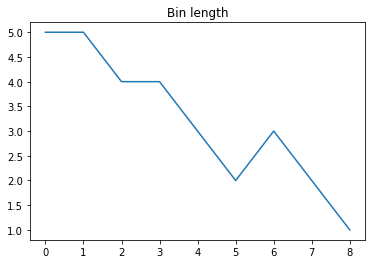

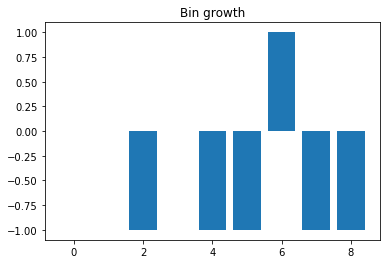

In [387]:
plt.figure()
plt.title("Bin length")
plt.plot(analysis_frame["bin_len"], "-")

plt.figure()
plt.title("Bin growth")
plt.bar(analysis_frame.index, analysis_frame["bin_growth"])

plt.show()